# Machine Learning
### By: Adam Aharony, adam.aharony@gmail.com, 214435448.

In [1]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
import seaborn as sns

import eli5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
df = pd.read_csv("processing/ready.csv")
df


,Year,Foundry,Process Size [nm],Transistors [million],Die Size [mm²],Production,GPU Clock [MHz],Memory Clock [MHz],Memory Size [GB],Memory Type,...,TDP [W],Outputs,Power Connectors,DirectX,OpenGL,Manufacturer,Cores,Shading Units,FP32 (float) performance [TFLOPS],Shader Model
0,2001,0.0,180.0,30.0,131.0,0.0,200.0,200.0,0.064,0.0,...,30.0,1.0,1.0,8.0,1.1,0,336.0,320.0,2.727746,5.1
1,2001,0.0,180.0,25.0,144.0,0.0,200.0,200.0,0.064,0.0,...,30.0,3.0,0.0,8.0,1.1,0,336.0,320.0,2.727746,5.1
2,2001,0.0,180.0,25.0,144.0,0.0,200.0,200.0,0.064,0.0,...,60.0,3.0,0.0,8.0,1.1,0,336.0,320.0,2.727746,5.1
3,2000,0.0,250.0,14.0,112.0,0.0,166.0,166.0,0.016,1.0,...,15.0,1.0,0.0,6.0,1.1,0,336.0,320.0,2.727746,5.1
4,2000,0.0,250.0,14.0,112.0,0.0,166.0,166.0,0.032,1.0,...,15.0,1.0,0.0,6.0,1.1,0,336.0,320.0,2.727746,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2003,1.0,130.0,90.0,144.0,0.0,350.0,500.0,0.256,6.0,...,48.0,3.0,0.0,9.0,1.4,7,336.0,320.0,2.727746,5.1
2160,2003,1.0,130.0,110.0,144.0,0.0,300.0,325.0,0.256,0.0,...,48.0,3.0,0.0,9.0,1.5,7,336.0,320.0,2.727746,5.1
2161,2003,1.0,130.0,110.0,144.0,0.0,300.0,450.0,0.256,6.0,...,48.0,2.0,0.0,9.0,1.5,7,336.0,320.0,2.727746,5.1
2162,2003,1.0,130.0,110.0,144.0,0.0,350.0,375.0,0.256,0.0,...,48.0,3.0,0.0,9.0,1.5,7,336.0,320.0,2.727746,5.1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               2164 non-null   int64  
 1   Foundry                            2164 non-null   float64
 2   Process Size [nm]                  2164 non-null   float64
 3   Transistors [million]              2164 non-null   float64
 4   Die Size [mm²]                     2164 non-null   float64
 5   Production                         2164 non-null   float64
 6   GPU Clock [MHz]                    2164 non-null   float64
 7   Memory Clock [MHz]                 2164 non-null   float64
 8   Memory Size [GB]                   2164 non-null   float64
 9   Memory Type                        2164 non-null   float64
 10  Memory Bus [bit]                   2164 non-null   float64
 11  Bandwidth [GB/s]                   2164 non-null   float

Let's define relevant columns:

In [4]:
relevant_cols = ['Transistors [million]', 'GPU Clock [MHz]', 'Memory Clock [MHz]', 'Bandwidth [GB/s]',
                 'TMUs', 'ROPs', 'Pixel Rate [GPixel/s]', 'Texture Rate [GTexel/s]', 'TDP [W]', 'Outputs',
                 'Power Connectors', 'FP32 (float) performance [TFLOPS]']


Plotting the pairplot to see if a column is a function of some other columns.

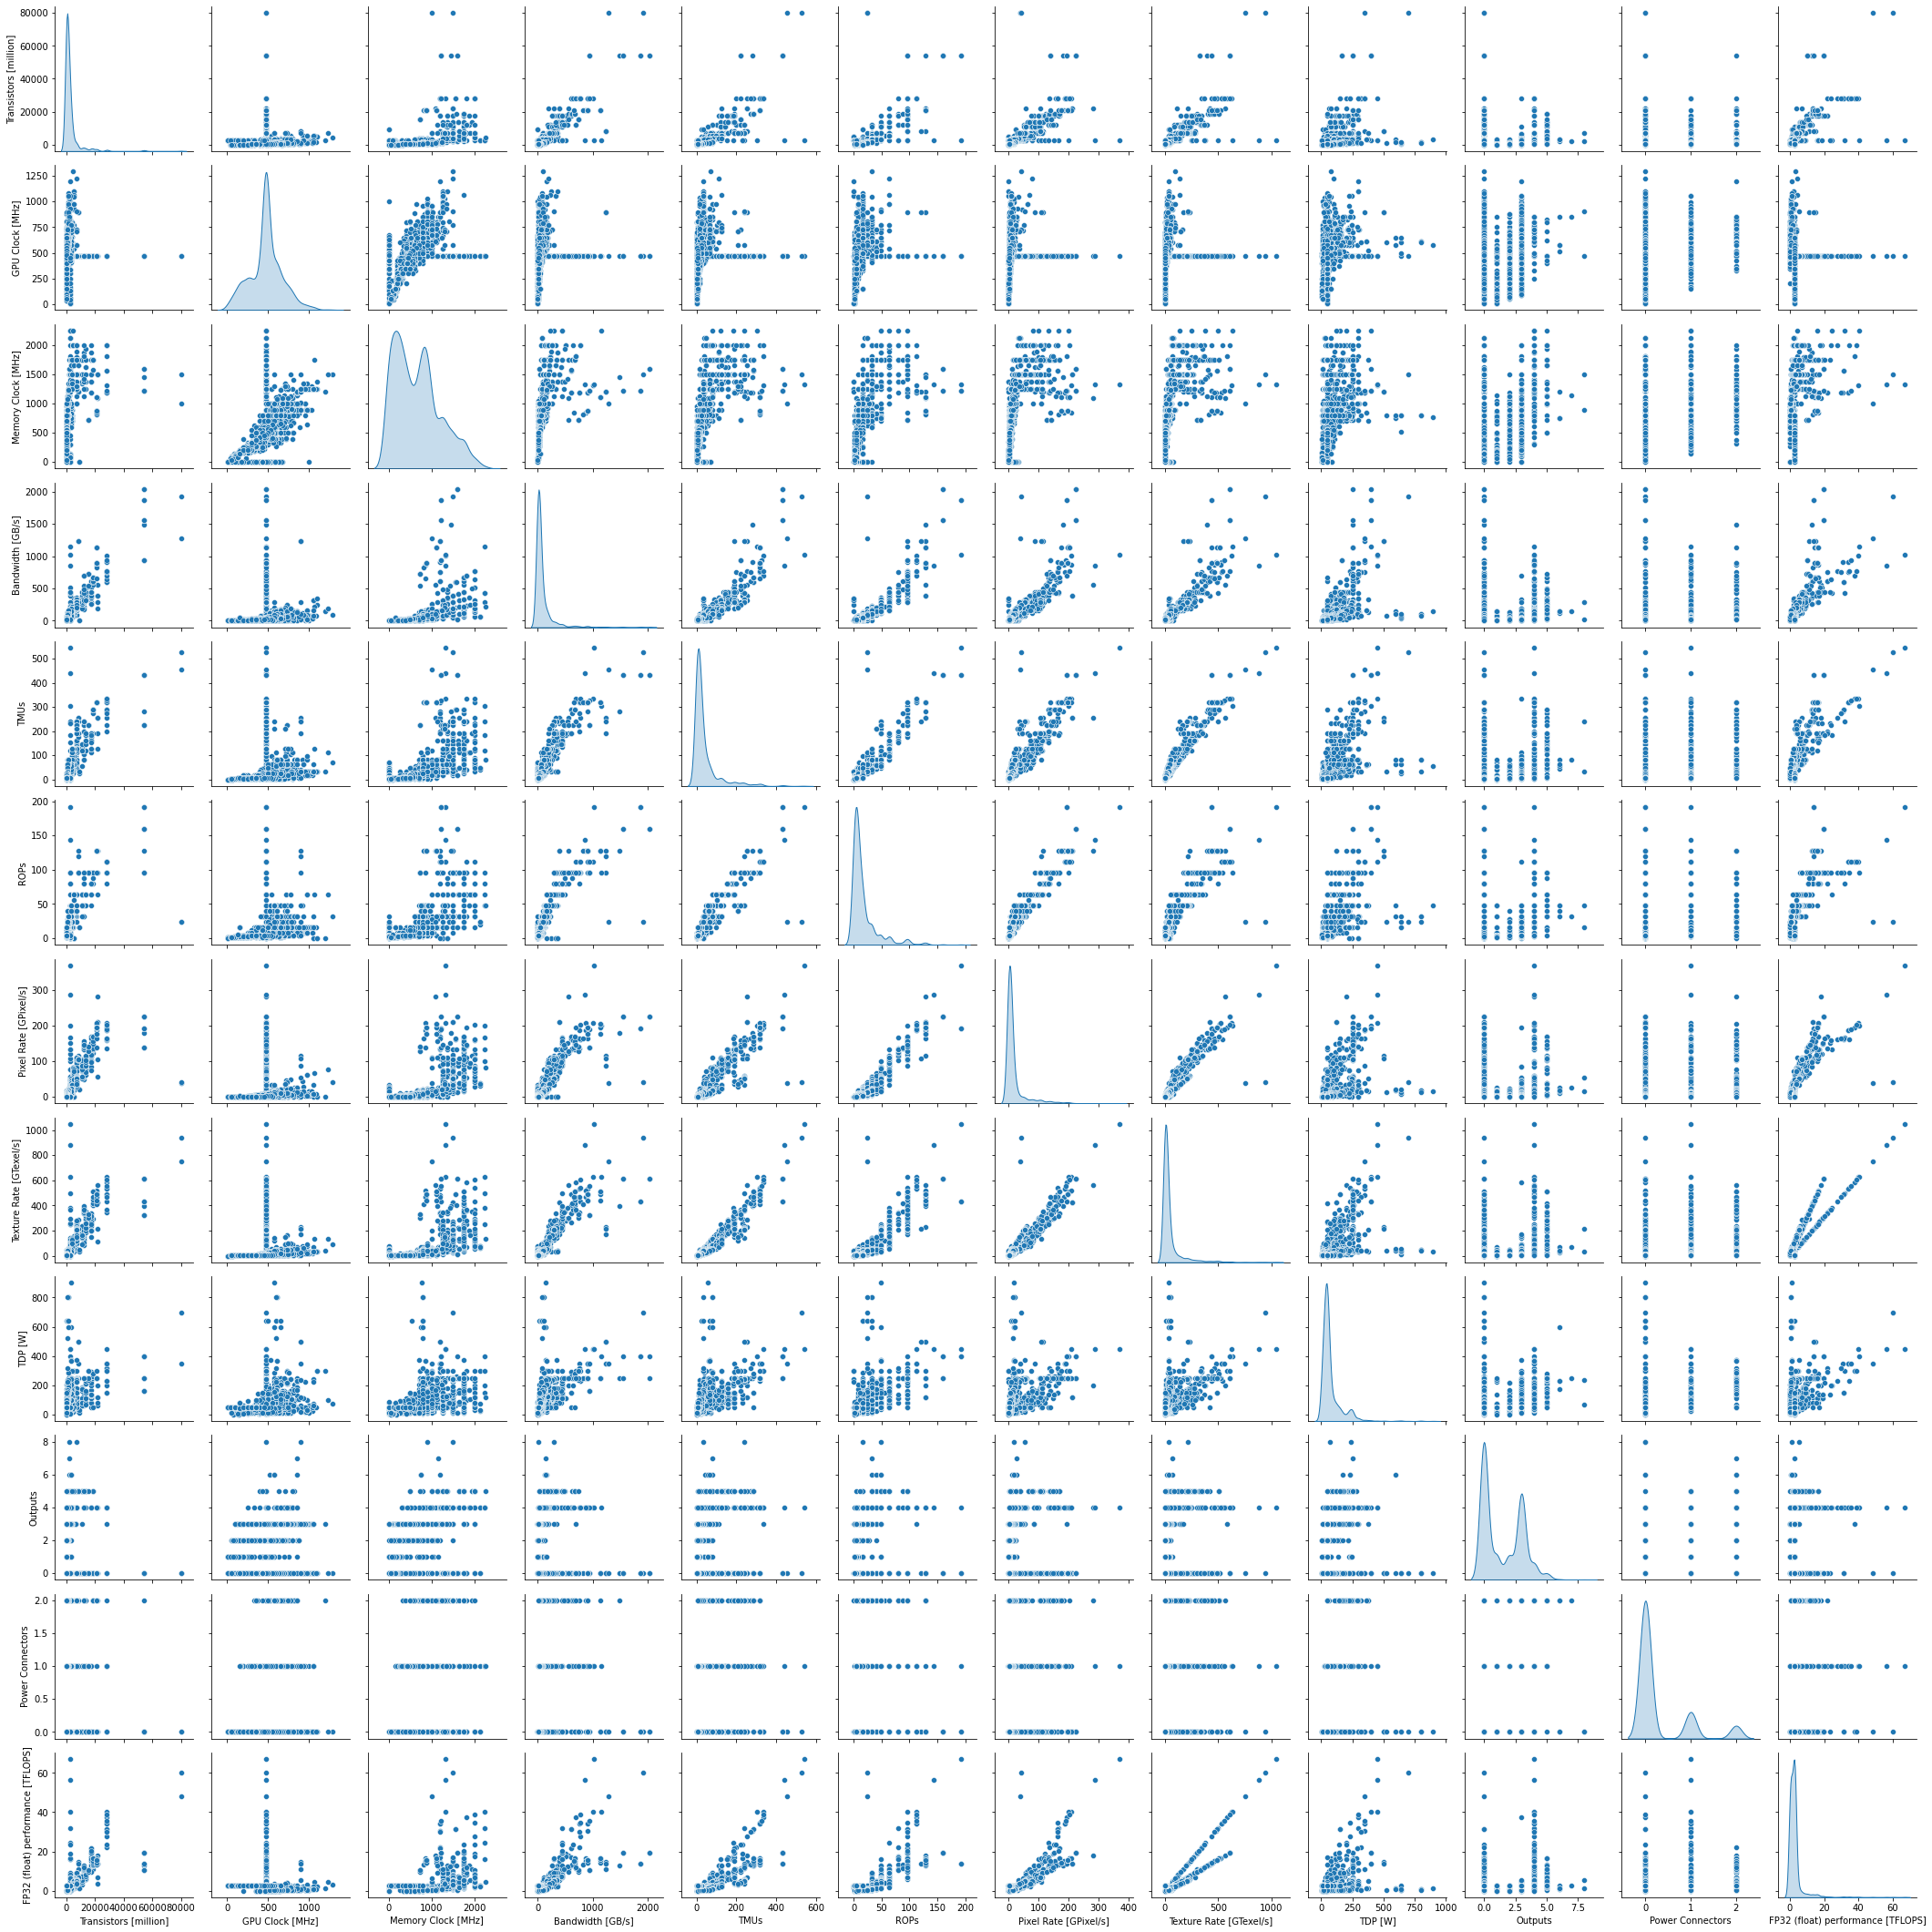

In [5]:
sns.pairplot(df[relevant_cols], diag_kind='kde')


### Linear Regression:

Defining the main procedure.

In [6]:
def LR_procedure(df, y_col):
    # Splitting the dataset
    y = df[y_col]
    X = df.drop([y_col], axis=1)
    # Splitting into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=111)
    # Training model
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    # Predicting and calculating score
    y_pred = clf.predict(X_test)
    score = r2_score(y_test, y_pred)

    return clf, score


We will run the regression algorithm for each relevant column, in order to see figure out the best regression variable:

In [7]:
LR_accs = dict()

for col in relevant_cols:
    clf, score = LR_procedure(df, col)
    LR_accs.update({col: (clf, score)})


Let's see the scores for each column:

In [8]:
d = {col: score for col, (_, score) in sorted(
    LR_accs.items(), key=lambda x: x[1][1], reverse=True)}
d = pd.DataFrame(d.values(), columns=["Accuracy"], index=d.keys())
d.to_csv("LR_results.csv")
d


,Accuracy
Texture Rate [GTexel/s],0.991092
TMUs,0.984466
Pixel Rate [GPixel/s],0.984067
FP32 (float) performance [TFLOPS],0.979663
ROPs,0.976653
Bandwidth [GB/s],0.933711
Transistors [million],0.799023
Memory Clock [MHz],0.798952
GPU Clock [MHz],0.679125
TDP [W],0.625758


Let's look at a specific model weights:

In [9]:
y_col = "Texture Rate [GTexel/s]"
clf, score = LR_accs[y_col]
feature_names = df.columns.drop([y_col])


In [10]:
eli5.show_weights(clf, feature_names=list(feature_names), top=50)


Weight?,Feature
+201.487,<BIAS>
+9.849,FP32 (float) performance [TFLOPS]
+7.531,OpenGL
+1.841,Power Connectors
+1.308,Pixel Rate [GPixel/s]
+1.295,Shader Model
+1.037,Memory Size [GB]
+0.924,TMUs
+0.330,Memory Type
+0.034,Bandwidth [GB/s]


### Deep Neural Network:

Defining DNN Procedure.

In [11]:
def DNN_procedure(df, y_col):
    # Splitting the dataset
    y = df[y_col]
    X = df.drop([y_col], axis=1)
    # Splitting into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=111)
    # Training model
    model = Sequential([
        Dense(26, input_dim=26),
        Dense(64),
        Dense(32),
        Dense(16),
        Dense(4),
        Dense(2),
        Dense(1)
    ])

    model.compile(
        loss="mse",
        optimizer="Adam",
    )

    history = model.fit(X_train, y_train, epochs=1000,
                        validation_data=(X_test, y_test))
    # Predicting and calculating score
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    return model, score


We will train a DNN for each relevant column, in order to compare to the Linear Regression benchmark:

In [12]:
DNN_accs = dict()

for col in relevant_cols:
    model, score = DNN_procedure(df, col)
    DNN_accs.update({col: (model, score)})


Epoch 1/1000
51/51 [==============================] - 1s 5ms/step - loss: 16312325.0000 - val_loss: 16639285.0000
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 12054577.0000 - val_loss: 12646212.0000
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 11280889.0000 - val_loss: 12054157.0000
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 10985922.0000 - val_loss: 11639269.0000
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 10078514.0000 - val_loss: 10848039.0000
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 10490146.0000 - val_loss: 10751081.0000
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 10082414.0000 - val_loss: 10421186.0000
Epoch 8/1000
51/51 [==============================] - 0s 2ms/step - loss: 9816832.0000 - val_loss: 10066548.0000
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 10443512.0000 -

In [13]:
d = {col: score for col, (_, score) in sorted(
    DNN_accs.items(), key=lambda x: x[1][1], reverse=True)}
d = pd.DataFrame(d.values(), columns=["Accuracy"], index=d.keys())
d.to_csv("DNN_results.csv")
d


,Accuracy
Texture Rate [GTexel/s],0.987718
Pixel Rate [GPixel/s],0.978324
FP32 (float) performance [TFLOPS],0.973285
ROPs,0.972792
TMUs,0.966112
Bandwidth [GB/s],0.930221
Transistors [million],0.780131
Memory Clock [MHz],0.737137
GPU Clock [MHz],0.646293
TDP [W],0.631426


### Conclusion:

We can see that the Logistic Regression technique is marginally better than the Deep Neural Network technique.